<img align="left" src="images/GMIT-logo.png" alt="GMIT" width="250"/>                                                      <img align="right" src="images/data-analytics.png" alt="HDipDA" width="300"/>  

# <center>Fundamentals of Data Analysis - Tips Project 2019</center> #

***
**Module Name**: Fundamentals of Data Analysis  
**Module Number**: 52446  
**Student Name**: Yvonne Brady  
**Student ID**: G00376355  
***

### Description - 30%###
Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter notebook that uses descriptive statistics and plots to describe the tips dataset. This part is worth 30% of your overall mark.

### Regression - 30% ###
To the above jupyter notebook add a section that discusses and analyses whether there is a relationship between the total bill and tip amount, and this part is also worth 30%.

### Analysis - 40% ###
Again using the same notebook, analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those. This part is worth 40%.

One waiter recorded information about each tip he received over a period of a few months working in one restaurant. They recorded several variables:
- _*total_bill*_ : Total Bill Amount
- _*tip*_ : Tip amount
- _*sex*_ : Gender of bill payer
- _*smoker*_ : Whether they were a smoker or not
- _*day*_ : What day of the week the transaction occurred
- _*time*_ : Whether the diner was being server lunch or dinner

In [1]:
# First of all import all the packages you need
# The importation of a lot of packages may have adverse affects on the performance of your script
# but this is not important for this dataset and investigation. 
# Should enhanced performance be required, the importation packages may be rethought. 

import numpy as np # foundation of all data processing packages
import pandas as pd # using dataframes etc
import matplotlib.pyplot as plt # plotting and as a basis for seaborn
import seaborn as sns # fancier plotting and statistics etc
import pandas_profiling # found this - for profiling the dataset initially
from scipy import stats # For statistics
from tabulate import tabulate # To make som etables a bit easier
import sklearn.neighbors as nei
import sklearn.model_selection as mod
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import io
import os
import requests
from sklearn import metrics

# magic command to allow for easier integration of matplotlib libraries
%matplotlib inline 


In [2]:
# And the dataset itself (also included in this repository)
tips = sns.load_dataset("tips")

In [3]:
# Now have a look at the data
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [4]:
print("The dataset has",tips.shape[0], "rows, each with", tips.shape[1], "attributes - totalling", tips.size, "data values in the dataset.")
print("Over the data collection period, the waiter served", tips['size'].sum(), "customers, generating an income of $", tips["total_bill"].sum(), ". ")
print("This resulted in tips totalling $", tips["tip"].sum(), ".")
print("The day breakdown is as follows:")
print(tips.groupby("day").size())

The dataset has 244 rows, each with 7 attributes - totalling 1708 data values in the dataset.
Over the data collection period, the waiter served 627 customers, generating an income of $ 4827.77 . 
This resulted in tips totalling $ 731.5799999999999 .
The day breakdown is as follows:
day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64


In [5]:
# Now have a look at the data - first the initial few rows to see what they look like
tips.head(5) # returns first 5 rows

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [6]:
# Then the last few rows as a check to ensure the data has not gone awry in the middle somewhere
tips.tail() # returns last 5 rows

total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

In [7]:
# And finally a random sample to see what else there is in there
tips.sample(5) # returns 5 randomly selected rows

total_bill   tip     sex smoker   day    time  size
33        20.69  2.45  Female     No   Sat  Dinner     4
13        18.43  3.00    Male     No   Sun  Dinner     4
129       22.82  2.18    Male     No  Thur   Lunch     3
43         9.68  1.32    Male     No   Sun  Dinner     2
62        11.02  1.98    Male    Yes   Sat  Dinner     2

**Just playing around here**  
Just playing around with the data on a category by category basis to see what they show.  
Unsure of how I should present these - as code and then summarised in markdown?  
Print functions displaying data above is ugly. It is likely that a lot of what follows will be discarded in any event.

In [8]:
pcTip = tips["tip"]/tips["total_bill"]
pcTip.head()

0    0.059447
1    0.160542
2    0.166587
3    0.139780
4    0.146808
dtype: float64

In [9]:
# Create dataframes based on the categories
dinner = tips.loc[tips["time"] == "Dinner"]
lunch = tips.loc[tips["time"] == "Lunch"]
smoker = tips.loc[tips["smoker"] == "Yes"]
nonsmoker = tips.loc[tips["smoker"] == "No"]
male = tips.loc[tips["sex"] == "Male"]
female = tips.loc[tips["sex"] == "Female"]
thurs = tips.loc[tips["day"] == "Thur"]
fri = tips.loc[tips["day"] == "Fri"]
sat = tips.loc[tips["day"] == "Sat"]
sun = tips.loc[tips["day"] == "Sun"]
size1 = tips.loc[tips["size"] == 1]
size2 = tips.loc[tips["size"] == 2]
size3 = tips.loc[tips["size"] == 3]
size4 = tips.loc[tips["size"] == 4]
size5 = tips.loc[tips["size"] == 5]
size6 = tips.loc[tips["size"] == 6]

In [75]:
table = [["Gender", "Male", male["total_bill"].count(), male["total_bill"].sum(),(male["total_bill"].sum()/male["size"].sum()), male["tip"].sum(), (male["tip"].sum()/male["size"].sum()), (male["tip"].sum()/male["total_bill"].sum())*100], \
        ["","Female", female["total_bill"].count(), female["total_bill"].sum(), (female["total_bill"].sum()/female["size"].sum()),female["tip"].sum(), (female["tip"].sum()/female["size"].sum()),  (female["tip"].sum()/female["total_bill"].sum())*100], \
        ["Smoking Status","Smoker", smoker["total_bill"].count(), smoker["total_bill"].sum(), (smoker["total_bill"].sum()/smoker["size"].sum()),smoker["tip"].sum(), (smoker["tip"].sum()/smoker["size"].sum()), (smoker["tip"].sum()/smoker["total_bill"].sum())*100], \
        ["","Non-Smoker", nonsmoker["total_bill"].count(), nonsmoker["total_bill"].sum(), (nonsmoker["total_bill"].sum()/nonsmoker["size"].sum()), nonsmoker["tip"].sum(), (nonsmoker["tip"].sum()/nonsmoker["size"].sum()), (nonsmoker["tip"].sum()/nonsmoker["total_bill"].sum())*100], \
        ["Time of Day","Dinner", dinner["total_bill"].count(), dinner["total_bill"].sum(), (dinner["total_bill"].sum()/dinner["size"].sum()), dinner["tip"].sum(), (dinner["tip"].sum()/dinner["size"].sum()), (dinner["tip"].sum()/dinner["total_bill"].sum())*100], \
        ["","Lunch", lunch["total_bill"].count(), lunch["total_bill"].sum(), (lunch["total_bill"].sum()/lunch["size"].sum()), lunch["tip"].sum(), (lunch["tip"].sum()/lunch["size"].sum()), (lunch["tip"].sum()/lunch["total_bill"].sum())*100], \
        ["Day","Thurs", thurs["total_bill"].count(), thurs["total_bill"].sum(), (thurs["total_bill"].sum()/thurs["size"].sum()), thurs["tip"].sum(), (thurs["tip"].sum()/thurs["size"].sum()), (thurs["tip"].sum()/thurs["total_bill"].sum())*100], \
        ["","Fri", fri["total_bill"].count(), fri["total_bill"].sum(), (fri["total_bill"].sum()/fri["size"].sum()), fri["tip"].sum(), (fri["tip"].sum()/fri["size"].sum()), (fri["tip"].sum()/fri["total_bill"].sum())*100], \
        ["","Sat", sat["total_bill"].count(), sat["total_bill"].sum(), (sat["total_bill"].sum()/sat["size"].sum()), sat["tip"].sum(), (sat["tip"].sum()/sat["size"].sum()), (sat["tip"].sum()/sat["total_bill"].sum())*100], \
        ["","Sun", sun["total_bill"].count(), sun["total_bill"].sum(), (sun["total_bill"].sum()/sun["size"].sum()), sun["tip"].sum(), (sun["tip"].sum()/sun["size"].sum()), (sun["tip"].sum()/sun["total_bill"].sum())*100], \
        ["Party Size","1", size1["total_bill"].count(), size1["total_bill"].sum(), (size1["total_bill"].sum()/size1["size"].sum()), size1["tip"].sum(), (size1["tip"].sum()/size1["size"].sum()), (size1["tip"].sum()/size1["total_bill"].sum())*100], \
        ["","2", size2["total_bill"].count(), size2["total_bill"].sum(), (size2["total_bill"].sum()/size2["size"].sum()), size2["tip"].sum(), (size2["tip"].sum()/size2["size"].sum()), (size2["tip"].sum()/size2["total_bill"].sum())*100], \
        ["","3", size3["total_bill"].count(), size3["total_bill"].sum(), (size3["total_bill"].sum()/size3["size"].sum()), size3["tip"].sum(), (size3["tip"].sum()/size3["size"].sum()), (size3["tip"].sum()/size3["total_bill"].sum())*100], \
        ["","4", size4["total_bill"].count(), size4["total_bill"].sum(), (size4["total_bill"].sum()/size4["size"].sum()), size4["tip"].sum(), (size4["tip"].sum()/size4["size"].sum()), (size4["tip"].sum()/size4["total_bill"].sum())*100], \
        ["","5", size5["total_bill"].count(), size5["total_bill"].sum(), (size5["total_bill"].sum()/size5["size"].sum()), size5["tip"].sum(), (size5["tip"].sum()/size5["size"].sum()), (size5["tip"].sum()/size5["total_bill"].sum())*100], \
        ["","6", size6["total_bill"].count(), size6["total_bill"].sum(), (size6["total_bill"].sum()/size6["size"].sum()), size6["tip"].sum(), (size6["tip"].sum()/size6["size"].sum()), (size6["tip"].sum()/size6["total_bill"].sum())*100]]

hdr = ["Category", "Classification", "Count", "Bill ($)", "Bill/Person ($)","Total Tips ($)", "Tip/Person ($)","Tip %"]

print(tabulate(table, headers = hdr,  tablefmt="grid"))

+----------------+------------------+---------+------------+-------------------+------------------+------------------+---------+
| Category       | Classification   |   Count |   Bill ($) |   Bill/Person ($) |   Total Tips ($) |   Tip/Person ($) |   Tip % |
+================+==================+=========+============+===================+==================+==================+=========+
| Gender         | Male             |     157 |    3256.82 |           7.88576 |           485.07 |         1.1745   | 14.894  |
+----------------+------------------+---------+------------+-------------------+------------------+------------------+---------+
|                | Female           |      87 |    1570.95 |           7.34089 |           246.51 |         1.15192  | 15.6918 |
+----------------+------------------+---------+------------+-------------------+------------------+------------------+---------+
| Smoking Status | Smoker           |      93 |    1930.34 |           8.61759 |           279.81

**General Observation**  
Based on the rudimentary calculations above, it would appear the best tip ratio is to be found if the waiter serves lunch on a Friday to a non-smoking woman dining on her own. Mind you this particular scenario accounted for exactly $0 in tips, so I guess the conclusion of this part would be - don't rely on generalities!
The most tips however would be obtained by serving a party of 2, non-smokers having dinner on a Saturday where the bill is being paid by a male.

In [11]:
(tips.groupby(["day", "time", "sex", "smoker", "size"])["tip"].sum() 
   .sort_values(ascending=False) 
   .reset_index(name='Total Tips') )

day    time     sex smoker  size  Total Tips
0    Sun  Dinner    Male     No     2       56.98
1    Sun  Dinner    Male     No     4       45.84
2    Sat  Dinner    Male     No     2       42.85
3   Thur   Lunch    Male     No     2       40.95
4    Sat  Dinner    Male    Yes     2       39.41
5   Thur   Lunch  Female     No     2       38.01
6    Sun  Dinner    Male    Yes     2       33.14
7    Sat  Dinner    Male     No     4       31.15
8    Sat  Dinner    Male     No     3       30.21
9    Sat  Dinner  Female    Yes     2       29.94
10  Thur   Lunch    Male    Yes     2       22.58
11   Sat  Dinner  Female     No     2       21.23
12   Sun  Dinner    Male     No     3       21.14
13   Sat  Dinner    Male    Yes     3       18.41
14   Sun  Dinner  Female     No     4       17.56
15   Sat  Dinner    Male    Yes     4       16.92
16   Sun  Dinner  Female     No     2       12.74
17  Thur   Lunch  Female    Yes     2       12.70
18   Fri  Dinner    Male    Yes     2       11.50
19   Sun  Dinner  Female     No     3       11.17
20   Fri  Dinner  Female    Yes     2       10.80
21   Sat  Dinner  Female     No     3       10.74
22   Sun  Dinner    Male    Yes     4       10.18
23  Thur   Lunch  Female     No     6        9.20
24   Sat  Dinner  Female    Yes     3        9.00
25  Thur   Lunch  Female     No     4        8.09
26   Fri   Lunch  Female    Yes     2        7.98
27   Sun  Dinner    Male    Yes     3        7.50
28   Sun  Dinner  Female    Yes     2        7.00
29   Sun  Dinner  Female    Yes     3        7.00
30  Thur   Lunch    Male     No     6        6.70
31   Sun  Dinner  Female     No     5        5.14
32   Fri  Dinner    Male     No     2        5.00
33  Thur   Lunch  Female    Yes     4        5.00
34  Thur   Lunch    Male     No     5        5.00
35   Sun  Dinner    Male     No     6        5.00
36   Sun  Dinner    Male     No     5        5.00
37   Fri  Dinner    Male    Yes     4        4.73
38  Thur   Lunch    Male    Yes     3        4.00
39  Thur   Lunch    Male    Yes     4        4.00
40  Thur   Lunch    Male     No     4        4.00
41   Fri   Lunch    Male    Yes     2        3.78
42   Fri  Dinner  Female     No     2        3.25
43  Thur   Lunch  Female    Yes     3        3.23
44   Sat  Dinner  Female    Yes     4        3.09
45   Fri   Lunch  Female     No     3        3.00
46  Thur  Dinner  Female     No     2        3.00
47   Sat  Dinner    Male    Yes     5        3.00
48   Sat  Dinner  Female     No     4        2.45
49  Thur   Lunch    Male     No     3        2.18
50   Sun  Dinner    Male    Yes     5        2.00
51   Fri   Lunch    Male    Yes     1        1.92
52  Thur   Lunch  Female     No     1        1.83
53  Thur   Lunch  Female     No     3        1.36
54   Sat  Dinner  Female    Yes     1        1.00
55   Sat  Dinner  Female     No     1        1.00

In [12]:
# Just checking which was the most common day and time
(tips.groupby(["day", "time"]).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   )

day    time  count
0   Sat  Dinner     87
1   Sun  Dinner     76
2  Thur   Lunch     61
3   Fri  Dinner     12
4   Fri   Lunch      7
5  Thur  Dinner      1

In [13]:
# Just checking which was the most common scenario - Sunday dinner with two non-smoking males apparently
(tips.groupby(["day", "time", "sex", "smoker", "size"]).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   )

day    time     sex smoker  size  count
0    Sun  Dinner    Male     No     2     22
1   Thur   Lunch  Female     No     2     18
2    Sat  Dinner    Male    Yes     2     17
3    Sat  Dinner    Male     No     2     17
4   Thur   Lunch    Male     No     2     16
5    Sun  Dinner    Male     No     4     12
6    Sat  Dinner  Female    Yes     2     11
7    Sun  Dinner    Male    Yes     2     10
8    Sat  Dinner    Male     No     3      9
9   Thur   Lunch    Male    Yes     2      8
10   Sat  Dinner  Female     No     2      8
11   Sun  Dinner    Male     No     3      7
12   Sat  Dinner    Male     No     4      6
13   Sat  Dinner    Male    Yes     4      5
14  Thur   Lunch  Female    Yes     2      5
15   Sun  Dinner  Female     No     2      5
16   Sun  Dinner  Female     No     4      4
17   Fri  Dinner  Female    Yes     2      4
18   Fri  Dinner    Male    Yes     2      4
19   Sat  Dinner    Male    Yes     3      4
20   Sun  Dinner  Female     No     3      4
21   Sat  Dinner  Female     No     3      3
22   Fri   Lunch  Female    Yes     2      3
23   Sat  Dinner  Female    Yes     3      2
24   Fri  Dinner    Male     No     2      2
25  Thur   Lunch  Female     No     6      2
26   Sun  Dinner  Female    Yes     2      2
27   Fri   Lunch    Male    Yes     2      2
28   Sun  Dinner  Female    Yes     3      2
29  Thur   Lunch  Female     No     4      2
30   Sun  Dinner    Male    Yes     4      2
31   Sun  Dinner    Male    Yes     3      2
32  Thur   Lunch    Male     No     5      1
33  Thur   Lunch  Female     No     3      1
34  Thur   Lunch    Male     No     4      1
35  Thur   Lunch  Female    Yes     3      1
36  Thur   Lunch  Female    Yes     4      1
37  Thur   Lunch    Male     No     3      1
38  Thur   Lunch  Female     No     1      1
39  Thur   Lunch    Male    Yes     4      1
40  Thur   Lunch    Male    Yes     3      1
41  Thur   Lunch    Male     No     6      1
42   Fri   Lunch    Male    Yes     1      1
43  Thur  Dinner  Female     No     2      1
44   Sat  Dinner  Female    Yes     4      1
45   Fri   Lunch  Female     No     3      1
46   Sun  Dinner    Male     No     6      1
47   Fri  Dinner    Male    Yes     4      1
48   Sun  Dinner    Male     No     5      1
49   Fri  Dinner  Female     No     2      1
50   Sun  Dinner    Male    Yes     5      1
51   Sat  Dinner    Male    Yes     5      1
52   Sat  Dinner  Female     No     4      1
53   Sat  Dinner  Female     No     1      1
54   Sat  Dinner  Female    Yes     1      1
55   Sun  Dinner  Female     No     5      1

In [14]:
tips["day"].value_counts()
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [15]:
tips.groupby("day").describe()

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   

       tip            ...                 size                                \
     count      mean  ...     75%    max count      mean       std  min  25%   
day                   ...                                                      
Thur  62.0  2.771452  ...  3.3625   6.70  62.0  2.451613  1.066285  1.0  2.0   
Fri   19.0  2.734737  ...  3.3650   4.73  19.0  2.105263  0.567131  1.0  2.0   
Sat   87.0  2.993103  ...  3.3700  10.00  87.0  2.517241  0.819275  1.0  2.0   
Sun   76.0  3.255132  ...  4.0000   6.50  76.0  2.842105  1.007341  2.0  2.0   

                     
      50%  75%  max  
day                  
Thur  2.0  2.0  6.0  
Fri   2.0  2.0  4.0  
Sat   2.0  3.0  5.0  
Sun   2.0  4.0  6.0  

[4 rows x 24 columns]

In [16]:
# Found this and thought it was worth trying ...
profile = pandas_profiling.ProfileReport(tips)
profile

In [17]:
# Adding the ratio into the dataframe
tips["ratio_tip_bill"] = pcTip

In [18]:
# Recreating dataframes based on the categories + Tip Bill Ratio
dinner = tips.loc[tips["time"] == "Dinner"]
lunch = tips.loc[tips["time"] == "Lunch"]
smoker = tips.loc[tips["smoker"] == "Yes"]
nonsmoker = tips.loc[tips["smoker"] == "No"]
male = tips.loc[tips["sex"] == "Male"]
female = tips.loc[tips["sex"] == "Female"]
thurs = tips.loc[tips["day"] == "Thur"]
fri = tips.loc[tips["day"] == "Fri"]
sat = tips.loc[tips["day"] == "Sat"]
sun = tips.loc[tips["day"] == "Sun"]
size1 = tips.loc[tips["size"] == 1]
size2 = tips.loc[tips["size"] == 2]
size3 = tips.loc[tips["size"] == 3]
size4 = tips.loc[tips["size"] == 4]
size5 = tips.loc[tips["size"] == 5]
size6 = tips.loc[tips["size"] == 6]

In [19]:
# Just checking it is in fact there
tips.describe()

total_bill         tip        size  ratio_tip_bill
count  244.000000  244.000000  244.000000      244.000000
mean    19.785943    2.998279    2.569672        0.160803
std      8.902412    1.383638    0.951100        0.061072
min      3.070000    1.000000    1.000000        0.035638
25%     13.347500    2.000000    2.000000        0.129127
50%     17.795000    2.900000    2.000000        0.154770
75%     24.127500    3.562500    3.000000        0.191475
max     50.810000   10.000000    6.000000        0.710345

In [20]:
# Running the profile report
tip_profile = pandas_profiling.ProfileReport(tips)
tip_profile

In [21]:
tip_profile.to_file(output_file="tip_output.html")

This is a really interesting summary of the data - with lots of information, both numeric and graphical contained within it.

## Start Plotting ##
First off we will look at the variables individually.  
  
_Note: This is preliminary - I will almost certainly not include everything here in final submission._

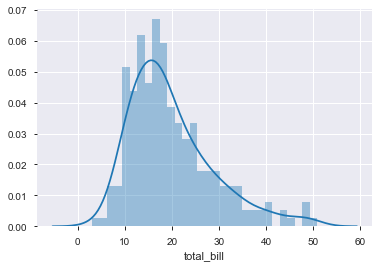

In [22]:
sns.distplot(tips['total_bill'],kde=True,bins=30)

Looking at the histogram displayed the bulk of the bills fell between the \\$10 to \\$25 bracket.

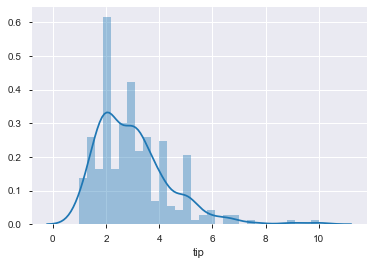

In [23]:
sns.distplot(tips['tip'],kde=True,bins=30)

And the bulk of the tips were between \\$1 and \\$3.50, with more outliers than in the bill amounts. Unlike the bill amounts though the outliers are more prevalent on the upward range.

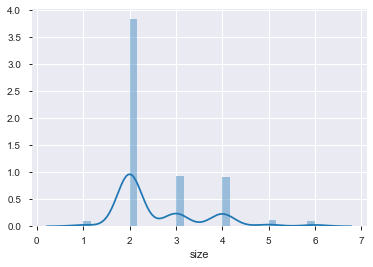

In [24]:
sns.distplot(tips['size'],kde=True,bins=30)

By far the most prevalent party size was 2 people.

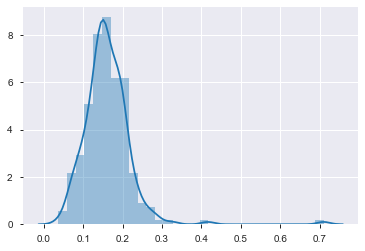

In [25]:
sns.distplot(pcTip,kde=True,bins=30)

As we can see from the plot above, most of the tips (as % of the total bill) fall between 10 - 20%, peaking at around the 15%.

(array([ 1.,  0.,  1.,  1.,  3.,  5., 10., 13., 12., 15., 10., 12., 18.,
         7., 23.,  9., 12.,  7.,  9., 10.,  5.,  5.,  9.,  8.,  3.,  2.,
         3.,  4.,  4.,  1.,  3.,  3.,  3.,  2.,  1.,  1.,  0.,  3.,  1.,
         1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([ 4.07  ,  5.2048,  6.3396,  7.4744,  8.6092,  9.744 , 10.8788,
        12.0136, 13.1484, 14.2832, 15.418 , 16.5528, 17.6876, 18.8224,
        19.9572, 21.092 , 22.2268, 23.3616, 24.4964, 25.6312, 26.766 ,
        27.9008, 29.0356, 30.1704, 31.3052, 32.44  , 33.5748, 34.7096,
        35.8444, 36.9792, 38.114 , 39.2488, 40.3836, 41.5184, 42.6532,
        43.788 , 44.9228, 46.0576, 47.1924, 48.3272, 49.462 , 50.5968,
        51.7316, 52.8664, 54.0012, 55.136 , 56.2708, 57.4056, 58.5404,
        59.6752, 60.81  ]),
 <a list of 50 Patch objects>)

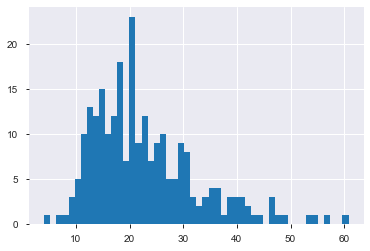

In [26]:
plt.hist((tips['tip']+tips["total_bill"])%100, 50)

## Plotting the Categorical Data ##

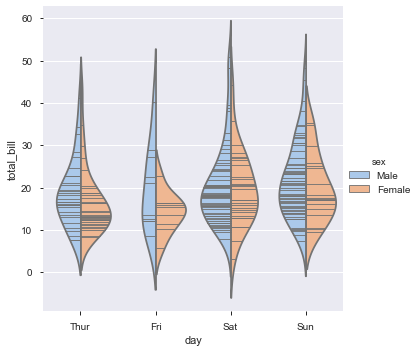

In [27]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

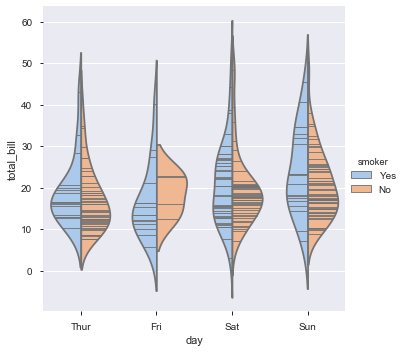

In [28]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

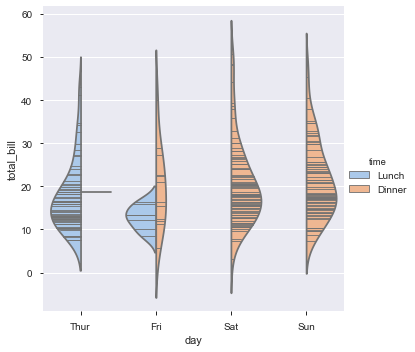

In [29]:
sns.catplot(x="day", y="total_bill", hue="time",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

## Bi-Variate Plotting ##

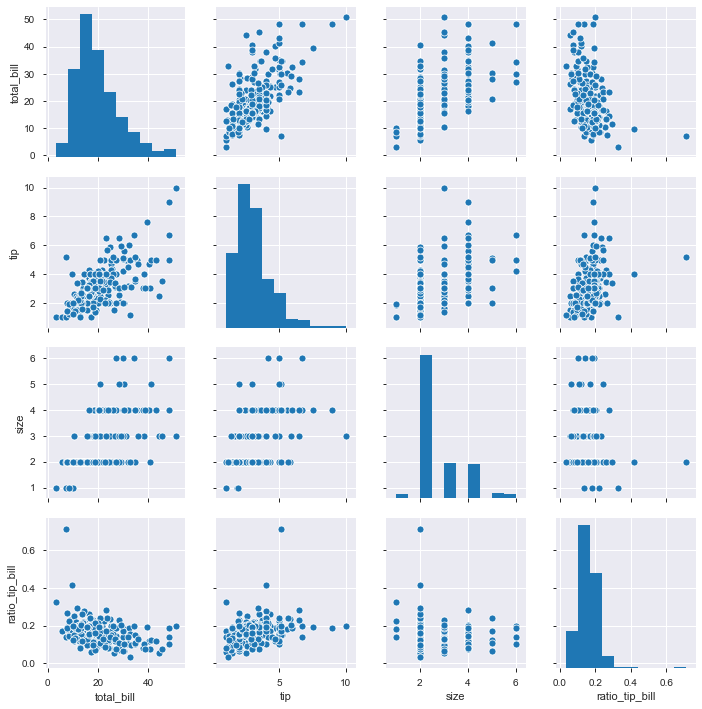

In [30]:
sns.pairplot(tips)

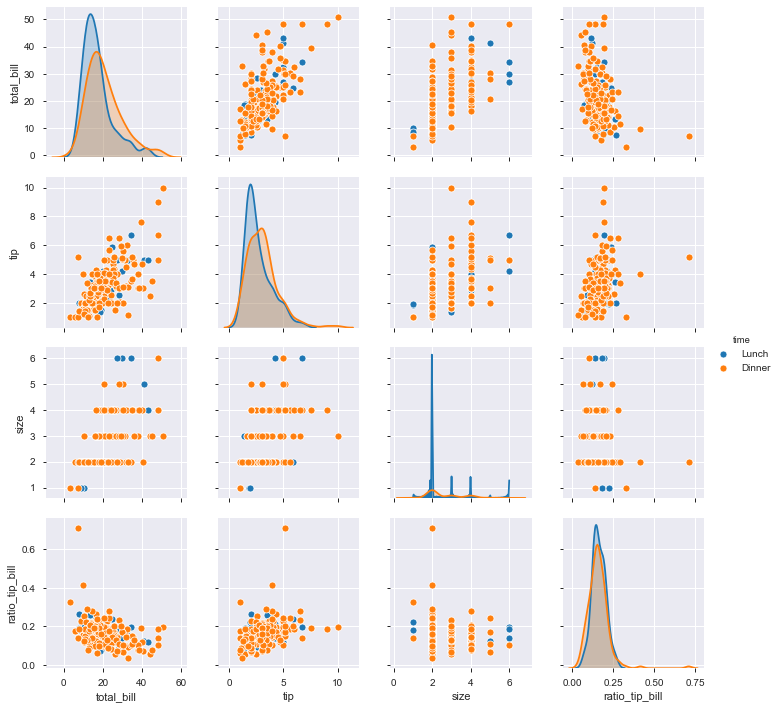

In [31]:
sns.pairplot(tips, hue = "time")

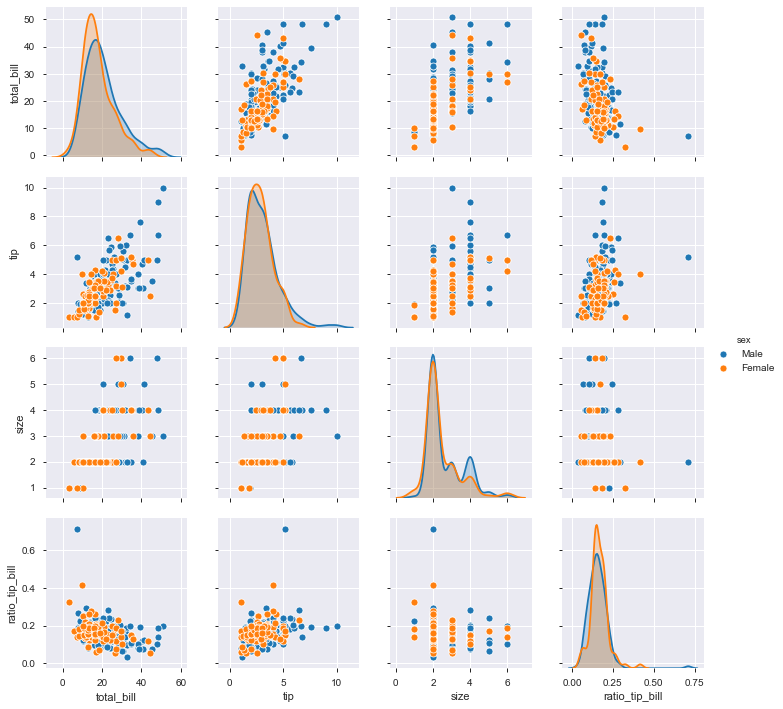

In [32]:
sns.pairplot(tips, hue = "sex")

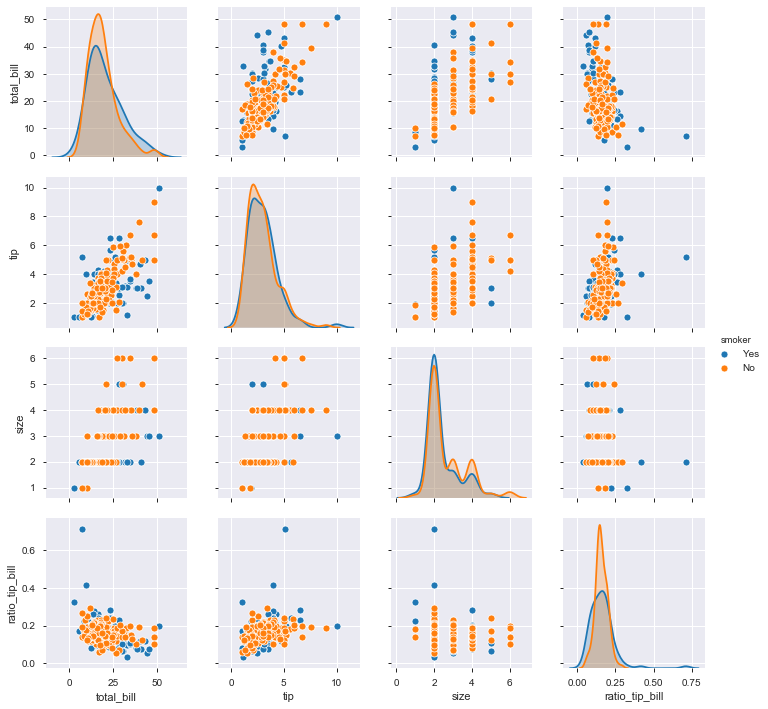

In [33]:
sns.pairplot(tips, hue = "smoker")

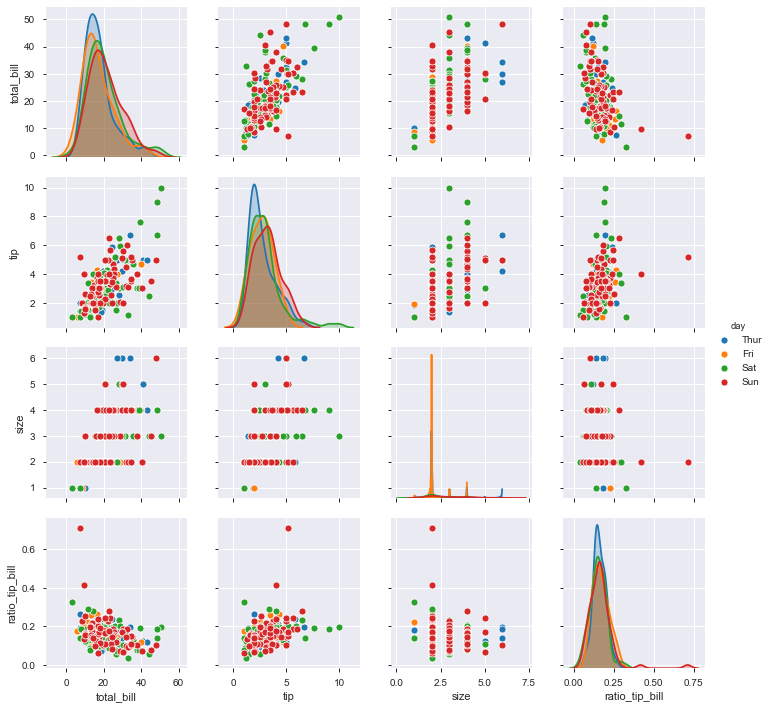

In [34]:
sns.pairplot(tips, hue = "day")

C:\Users\ybrady\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ybrady\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


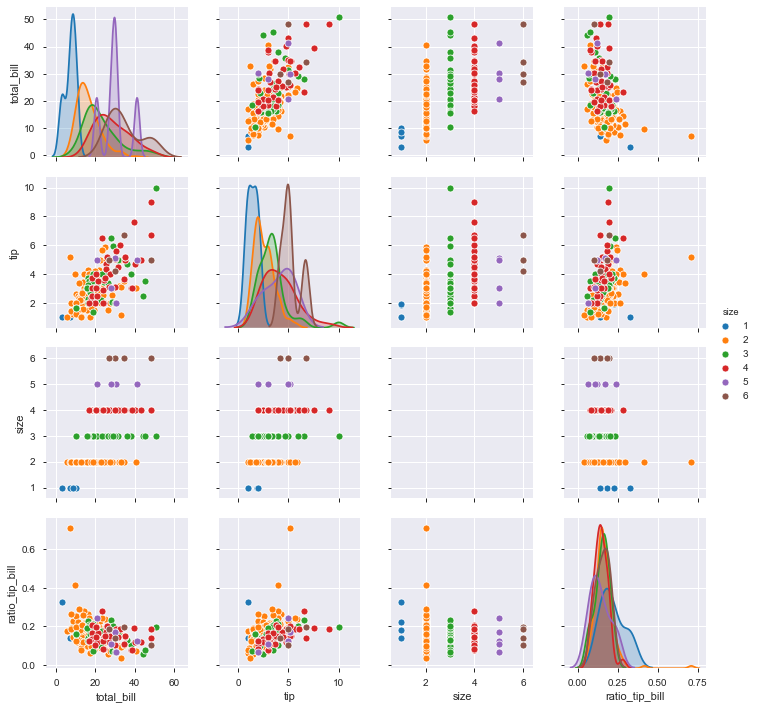

In [35]:
sns.pairplot(tips, hue = "size")

In [36]:
# Get the regression line using all the data
t_slope, t_intercept, t_r2, t_p, t_stdErr = stats.linregress(tips["total_bill"], tips["tip"])

In [37]:
# See how good a fit it is
t_r2

0.6757341092113641

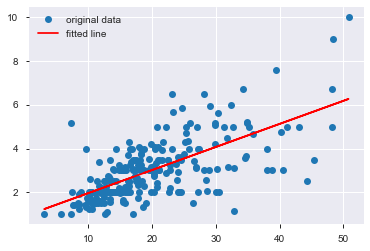

In [38]:
# Plot both the raw data and the "best fit" line
plt.plot(tips["total_bill"], tips["tip"], 'o', label='original data')
plt.plot(tips["total_bill"], t_intercept + t_slope*tips["total_bill"], 'r', label='fitted line')
plt.legend()
plt.show()

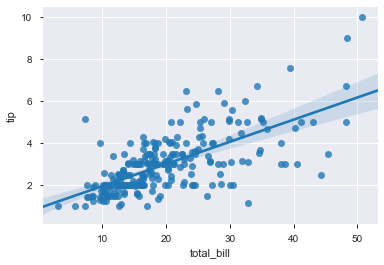

In [39]:
# Another view on the data 
sns.regplot(x="total_bill", y="tip", data=tips)

In [40]:
# Time of day comparison
# Get the regression line using all the data
d_slope, d_intercept, d_r2, d_p, d_stdErr = stats.linregress(dinner["total_bill"], dinner["tip"])
l_slope, l_intercept, l_r2, l_p, l_stdErr = stats.linregress(lunch["total_bill"], lunch["tip"])
print("r^2 dinner (Dataset size", len(dinner.index), "rows) = ", d_r2)
print("r^2 lunch (Dataset size", len(lunch.index), "rows) = ", l_r2)

r^2 dinner (Dataset size 176 rows) =  0.632871246985668
r^2 lunch (Dataset size 68 rows) =  0.8054238363495536


In [41]:
# Check if the time values are statistically different
print("T-Test Results")
print("Total Bill results:", stats.ttest_ind(dinner['total_bill'], lunch['total_bill']))
print("Tip results:", stats.ttest_ind(dinner['tip'], lunch['tip']))
print("Party Size results:", stats.ttest_ind(dinner['size'], lunch['size']))
print("Tip Bill Ratio results:", stats.ttest_ind(dinner['ratio_tip_bill'], lunch['ratio_tip_bill']))

T-Test Results
Total Bill results: Ttest_indResult(statistic=2.8976375218366424, pvalue=0.004104621407595674)
Tip results: Ttest_indResult(statistic=1.9062569301202392, pvalue=0.05780153475171558)
Party Size results: Ttest_indResult(statistic=1.6173673798749002, pvalue=0.1071016933042903)
Tip Bill Ratio results: Ttest_indResult(statistic=-0.5278867814179384, pvalue=0.5980616074405452)


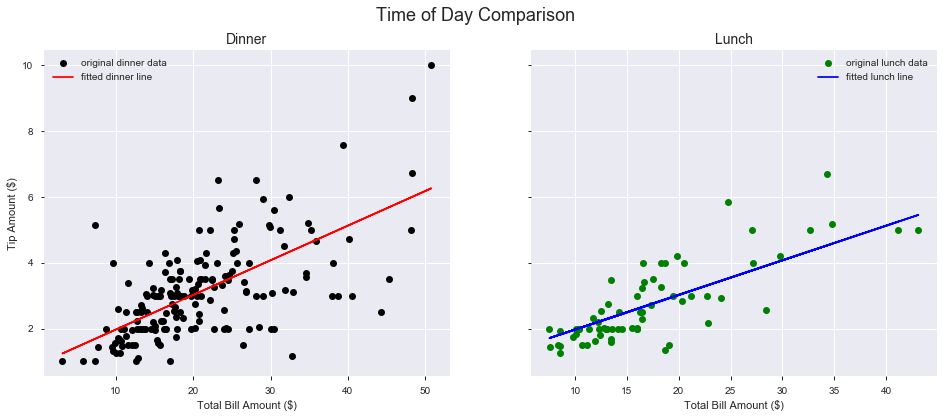

In [42]:
plt.rcParams['figure.figsize'] = [16, 6]

# Plot both the raw data and the "best fit" lines
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(dinner["total_bill"], dinner["tip"], 'ko', label='original dinner data')
ax1.plot(dinner["total_bill"], t_intercept + t_slope*dinner["total_bill"], 'r', label='fitted dinner line')
ax1.legend()
ax2.plot(lunch["total_bill"], lunch["tip"], 'go', label='original lunch data')
ax2.plot(lunch["total_bill"], t_intercept + t_slope*lunch["total_bill"], 'b', label='fitted lunch line')
ax2.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
fig.suptitle('Time of Day Comparison', fontsize=18)
ax1.set_title('Dinner',fontsize=14)
ax2.set_title('Lunch',fontsize=14)
plt.show()

In [43]:
# Smoker comparison
# Get the regression line using all the data
s_slope, s_intercept, s_r2, s_p, s_stdErr = stats.linregress(smoker["total_bill"], smoker["tip"])
ns_slope, ns_intercept, ns_r2, ns_p, ns_stdErr = stats.linregress(nonsmoker["total_bill"], nonsmoker["tip"])
print("r^2 smokers (Dataset size", len(smoker.index), "rows) = ", s_r2)
print("r^2 non-smokers (Dataset size", len(nonsmoker.index), "rows) = ", ns_r2)

r^2 smokers (Dataset size 93 rows) =  0.48821794116281036
r^2 non-smokers (Dataset size 151 rows) =  0.8221826257050836


In [44]:
# Check if the smoking status values are statistically different
print("T-Test Results")
print("Total results:", stats.ttest_ind(smoker['total_bill'], nonsmoker['total_bill']))
print("Tip results:", stats.ttest_ind(smoker['tip'], nonsmoker['tip']))
print("Party Size results:", stats.ttest_ind(smoker['size'], nonsmoker['size']))
print("Tip Bill Ratio results:", stats.ttest_ind(smoker['ratio_tip_bill'], nonsmoker['ratio_tip_bill']))

T-Test Results
Total results: Ttest_indResult(statistic=1.3384363834700073, pvalue=0.1820103288430244)
Tip results: Ttest_indResult(statistic=0.09222805186888201, pvalue=0.9265931522244976)
Party Size results: Ttest_indResult(statistic=-2.0903882645117493, pvalue=0.03762676724560343)
Tip Bill Ratio results: Ttest_indResult(statistic=0.4796693002669869, pvalue=0.6318957776878522)


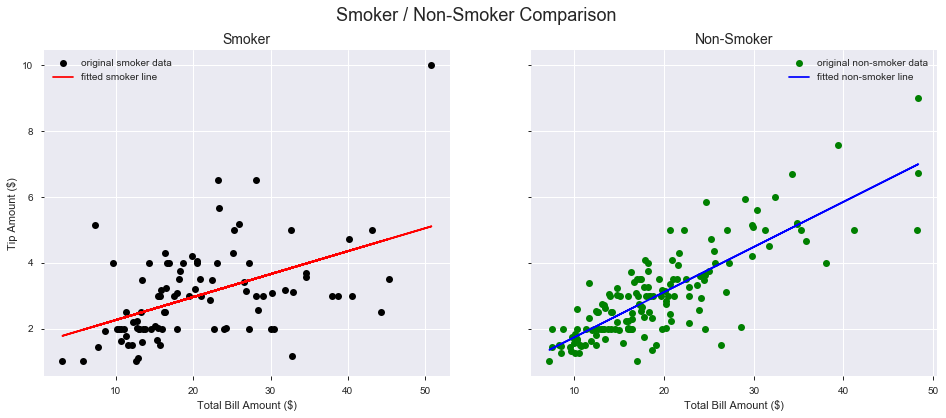

In [45]:
plt.rcParams['figure.figsize'] = [16, 6]
#fig=plt.figure(figsize=(5, 10),  facecolor='w', edgecolor='k')
# Plot both the raw data and the "best fit" lines
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(smoker["total_bill"], smoker["tip"], 'ko', label='original smoker data')
ax1.plot(smoker["total_bill"], s_intercept + s_slope*smoker["total_bill"], 'r', label='fitted smoker line')
ax1.legend()
ax2.plot(nonsmoker["total_bill"], nonsmoker["tip"], 'go', label='original non-smoker data')
ax2.plot(nonsmoker["total_bill"], ns_intercept + ns_slope*nonsmoker["total_bill"], 'b', label='fitted non-smoker line')
ax2.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
fig.suptitle('Smoker / Non-Smoker Comparison', fontsize=18)
ax1.set_title('Smoker',fontsize=14)
ax2.set_title('Non-Smoker',fontsize=14)
plt.show()

In [46]:
# Gender comparison
# Get the regression line using all the data
m_slope, m_intercept, m_r2, m_p, m_stdErr = stats.linregress(male["total_bill"], male["tip"])
f_slope, f_intercept, f_r2, f_p, f_stdErr = stats.linregress(female["total_bill"], female["tip"])
print("r^2 male (Dataset size", len(male.index), "rows) = ", m_r2)
print("r^2 female (Dataset size", len(female.index), "rows) = ", f_r2)

r^2 male (Dataset size 157 rows) =  0.6697529858911426
r^2 female (Dataset size 87 rows) =  0.6829992918122414


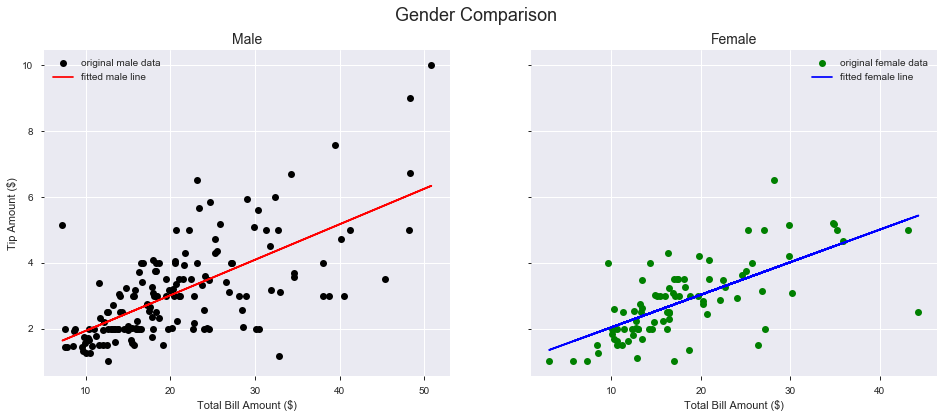

In [47]:
plt.rcParams['figure.figsize'] = [16, 6]
#fig=plt.figure(figsize=(5, 10),  facecolor='w', edgecolor='k')
# Plot both the raw data and the "best fit" lines
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(male["total_bill"], male["tip"], 'ko', label='original male data')
ax1.plot(male["total_bill"], m_intercept + m_slope*male["total_bill"], 'r', label='fitted male line')
ax1.legend()
ax2.plot(female["total_bill"], female["tip"], 'go', label='original female data')
ax2.plot(female["total_bill"], f_intercept + f_slope*female["total_bill"], 'b', label='fitted female line')
ax2.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
fig.suptitle('Gender Comparison', fontsize=18)
ax1.set_title('Male',fontsize=14)
ax2.set_title('Female',fontsize=14)
plt.show()

In [48]:
# Check if the gender values are statistically different
print("T-Test Results")
print("Total Bill results:", stats.ttest_ind(male['total_bill'], female['total_bill']))
print("Tip results:", stats.ttest_ind(male['tip'], female['tip']))
print("Party Size results:", stats.ttest_ind(male['size'], female['size']))
print("Tip Bill Ratio results:", stats.ttest_ind(male['ratio_tip_bill'], female['ratio_tip_bill']))

T-Test Results
Total Bill results: Ttest_indResult(statistic=2.2777940289803134, pvalue=0.0236116668468594)
Tip results: Ttest_indResult(statistic=1.3878597054212687, pvalue=0.16645623503456763)
Party Size results: Ttest_indResult(statistic=1.3458856268018975, pvalue=0.1795988999141355)
Tip Bill Ratio results: Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)


In [49]:
# Party Size comparison
# Get the regression line using all the data
s1_slope, s1_intercept, s1_r2, s1_p, s1_stdErr = stats.linregress(size1["total_bill"], size1["tip"])
s2_slope, s2_intercept, s2_r2, s2_p, s2_stdErr = stats.linregress(size2["total_bill"], size2["tip"])
s3_slope, s3_intercept, s3_r2, s3_p, s3_stdErr = stats.linregress(size3["total_bill"], size3["tip"])
s4_slope, s4_intercept, s4_r2, s4_p, s4_stdErr = stats.linregress(size4["total_bill"], size4["tip"])
s5_slope, s5_intercept, s5_r2, s5_p, s5_stdErr = stats.linregress(size5["total_bill"], size5["tip"])
s6_slope, s6_intercept, s6_r2, s6_p, s6_stdErr = stats.linregress(size6["total_bill"], size6["tip"])
print("r^2 Party Size 1 (Dataset size", len(size1.index), "rows) = ", s1_r2)
print("r^2 Party Size 2 (Dataset size", len(size2.index), "rows) = ", s2_r2)
print("r^2 Party Size 3 (Dataset size", len(size3.index), "rows) = ", s3_r2)
print("r^2 Party Size 4 (Dataset size", len(size4.index), "rows) = ", s4_r2)
print("r^2 Party Size 5 (Dataset size", len(size5.index), "rows) = ", s5_r2)
print("r^2 Party Size 6 (Dataset size", len(size6.index), "rows) = ", s6_r2)

r^2 Party Size 1 (Dataset size 4 rows) =  0.7819380610281642
r^2 Party Size 2 (Dataset size 156 rows) =  0.4811509958463354
r^2 Party Size 3 (Dataset size 38 rows) =  0.5897440237023541
r^2 Party Size 4 (Dataset size 37 rows) =  0.6760879540843564
r^2 Party Size 5 (Dataset size 5 rows) =  0.062186249409241744
r^2 Party Size 6 (Dataset size 4 rows) =  0.10535541767159408


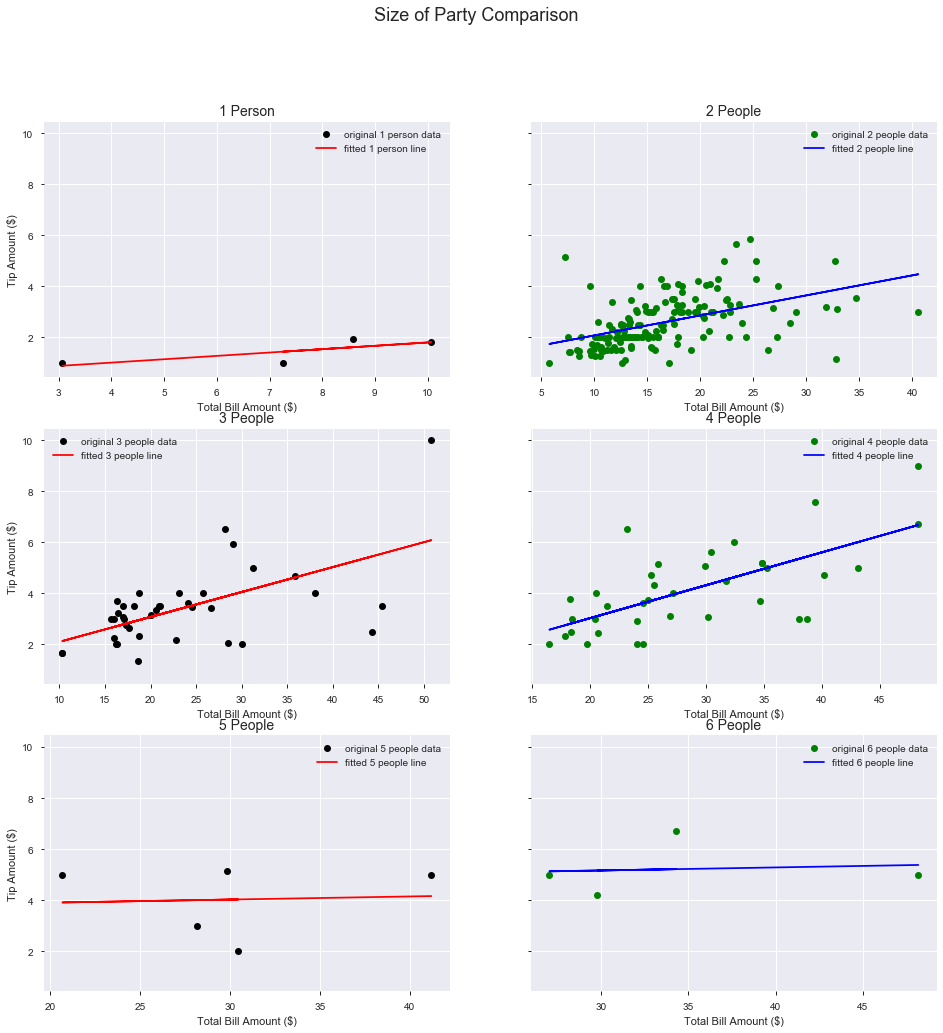

In [50]:
plt.rcParams['figure.figsize'] = [16,16]

# Plot both the raw data and the "best fit" lines
fig, ((ax1, ax2), (ax3, ax4), ( ax5, ax6)) = plt.subplots(3, 2, sharey=True)

ax1.plot(size1["total_bill"], size1["tip"], 'ko', label='original 1 person data')
ax1.plot(size1["total_bill"], s1_intercept + s1_slope*size1["total_bill"], 'r', label='fitted 1 person line')
ax1.legend()
ax2.plot(size2["total_bill"], size2["tip"], 'go', label='original 2 people data')
ax2.plot(size2["total_bill"], s2_intercept + s2_slope*size2["total_bill"], 'b', label='fitted 2 people line')
ax2.legend()
ax3.plot(size3["total_bill"], size3["tip"], 'ko', label='original 3 people data')
ax3.plot(size3["total_bill"], s3_intercept + s3_slope*size3["total_bill"], 'r', label='fitted 3 people line')
ax3.legend()
ax4.plot(size4["total_bill"], size4["tip"], 'go', label='original 4 people data')
ax4.plot(size4["total_bill"], s4_intercept + s4_slope*size4["total_bill"], 'b', label='fitted 4 people line')
ax4.legend()
ax5.plot(size5["total_bill"], size5["tip"], 'ko', label='original 5 people data')
ax5.plot(size5["total_bill"], s5_intercept + s5_slope*size5["total_bill"], 'r', label='fitted 5 people line')
ax5.legend()
ax6.plot(size6["total_bill"], size6["tip"], 'go', label='original 6 people data')
ax6.plot(size6["total_bill"], s6_intercept + s6_slope*size6["total_bill"], 'b', label='fitted 6 people line')
ax6.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax3.set_xlabel('Total Bill Amount ($)')
ax4.set_xlabel('Total Bill Amount ($)')
ax5.set_xlabel('Total Bill Amount ($)')
ax6.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
ax3.set_ylabel('Tip Amount ($)')
ax5.set_ylabel('Tip Amount ($)')
fig.suptitle('Size of Party Comparison', fontsize=18)
ax1.set_title('1 Person',fontsize=14)
ax2.set_title('2 People',fontsize=14)
ax3.set_title('3 People',fontsize=14)
ax4.set_title('4 People',fontsize=14)
ax5.set_title('5 People',fontsize=14)
ax6.set_title('6 People',fontsize=14)
plt.show()

In [51]:
# Check if the time values are statistically different
print("ANOVA Results")
print("Total Bill Results", stats.f_oneway(size1['total_bill'], size2['total_bill'], size3['total_bill'], size4['total_bill'], size5['total_bill'], size6['total_bill']))
print("Tip Results", stats.f_oneway(size1['tip'], size2['tip'], size3['tip'], size4['tip'], size5['tip'], size6['tip']))
print("Tip Bill Ratio Results", stats.f_oneway(size1['ratio_tip_bill'], size2['ratio_tip_bill'], size3['ratio_tip_bill'], size4['ratio_tip_bill'], size5['ratio_tip_bill'], size6['ratio_tip_bill']))

ANOVA Results
Total Bill Results F_onewayResult(statistic=28.09461523749822, pvalue=2.434919254210166e-22)
Tip Results F_onewayResult(statistic=15.746330672727057, pvalue=2.1694633916208174e-13)
Tip Bill Ratio Results F_onewayResult(statistic=1.6006611389163496, pvalue=0.16064144658923415)


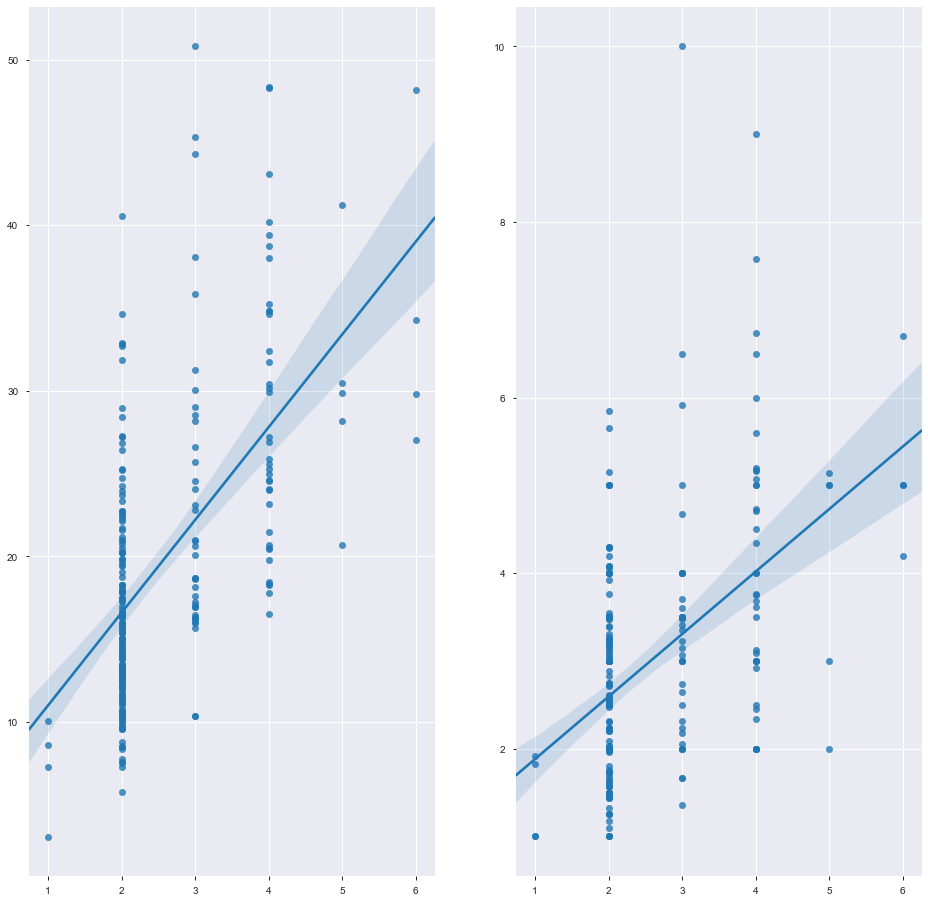

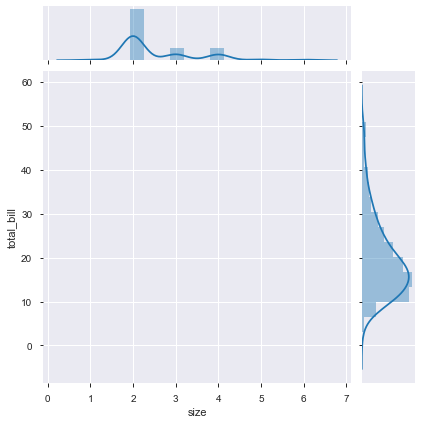

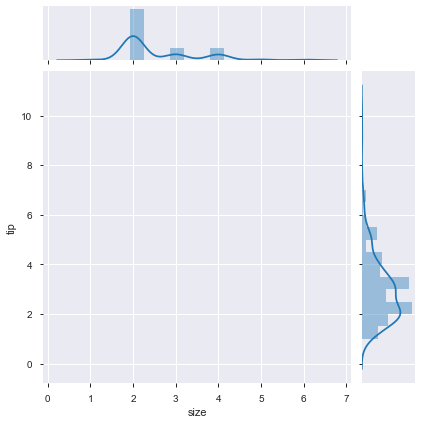

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.jointplot(x = 'size', y = 'total_bill', data = tips, kind = 'reg', ax = ax1)
sns.jointplot(x = 'size', y = 'tip', data = tips, kind = 'reg', ax = ax2)

In [53]:
table = [["Smokers", len(smoker.index), s_slope, s_intercept, s_r2, s_p, s_stdErr], \
         ["Non-Smokers", len(nonsmoker.index), ns_slope, ns_intercept, ns_r2, ns_p, ns_stdErr], \
         ["Male", len(male.index), m_slope, m_intercept, m_r2, m_p, m_stdErr], \
         ["Female", len(female.index), f_slope, f_intercept, f_r2, f_p, f_stdErr], \
         ["Lunch", len(lunch.index), l_slope, l_intercept, l_r2, l_p, l_stdErr], \
         ["Dinner", len(dinner.index), d_slope, d_intercept, d_r2, d_p, d_stdErr], \
         ["Party of 1", len(size1.index), s1_slope, s1_intercept, s1_r2, s1_p, s1_stdErr], \
         ["Party of 2", len(size2.index), s2_slope, s2_intercept, s2_r2, s2_p, s2_stdErr], \
         ["Party of 3", len(size3.index), s3_slope, s3_intercept, s3_r2, s3_p, s3_stdErr], \
         ["Party of 4", len(size4.index), s4_slope, s4_intercept, s4_r2, s4_p, s4_stdErr], \
         ["Party of 5", len(size5.index), s5_slope, s5_intercept, s5_r2, s5_p, s5_stdErr], \
         ["Party of 6", len(size6.index), s6_slope, s6_intercept, s6_r2, s6_p, s6_stdErr]]
hdr = ["Category", "Sample Size", "Slope", "Intercept", "R^2 Value", "P-Value", "Std Error"]
print(tabulate(table, headers = hdr,  tablefmt="grid"))

+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Category    |   Sample Size |     Slope |   Intercept |   R^2 Value |     P-Value |   Std Error |
+=============+===============+===========+=============+=============+=============+=============+
| Smokers     |            93 | 0.0695902 |    1.56427  |   0.488218  | 6.89401e-07 |  0.0130404  |
+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Non-Smokers |           151 | 0.137156  |    0.360069 |   0.822183  | 2.72556e-38 |  0.00777922 |
+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Male        |           157 | 0.107861  |    0.852148 |   0.669753  | 8.75758e-22 |  0.00960568 |
+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Female      |            87 | 0.0988779 |    1.04802  |   0.682999  | 3.15953e-13 |  0.0114694  |


In [54]:
# Size comparison
# Get the regression line using all the data
bs_slope, bs_intercept, bs_r2, bs_p, bs_stdErr = stats.linregress(tips["total_bill"], tips["size"])
ts_slope, ts_intercept, ts_r2, ts_p, ts_stdErr = stats.linregress(tips["tip"], tips["size"])
print("r^2 Size vs Total Bill = ", bs_r2)
print("r^2 Size vs Tip = ", ts_r2)

r^2 Size vs Total Bill =  0.5983151309049023
r^2 Size vs Tip =  0.4892987752303577


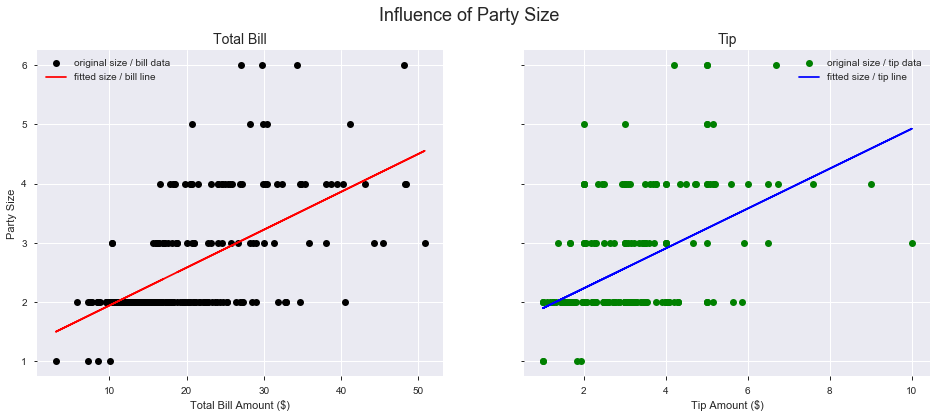

In [55]:
plt.rcParams['figure.figsize'] = [16, 6]
#fig=plt.figure(figsize=(5, 10),  facecolor='w', edgecolor='k')
# Plot both the raw data and the "best fit" lines
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(tips["total_bill"], tips["size"], 'ko', label='original size / bill data')
ax1.plot(tips["total_bill"], bs_intercept + bs_slope*tips["total_bill"], 'r', label='fitted size / bill line')
ax1.legend()
ax2.plot(tips["tip"], tips["size"], 'go', label='original size / tip data')
ax2.plot(tips["tip"], ts_intercept + ts_slope*tips["tip"], 'b', label='fitted size / tip line')
ax2.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Tip Amount ($)')
ax1.set_ylabel('Party Size')
fig.suptitle('Influence of Party Size', fontsize=18)
ax1.set_title('Total Bill',fontsize=14)
ax2.set_title('Tip',fontsize=14)
plt.show()

Looking at how the party size influences both the total bill and the tip - it is clear that the tip amount does not have as good correlation with the party size as the total bill amount does. 

r^2 Size vs Tip / Bill Ratio =  -0.14285960069312362


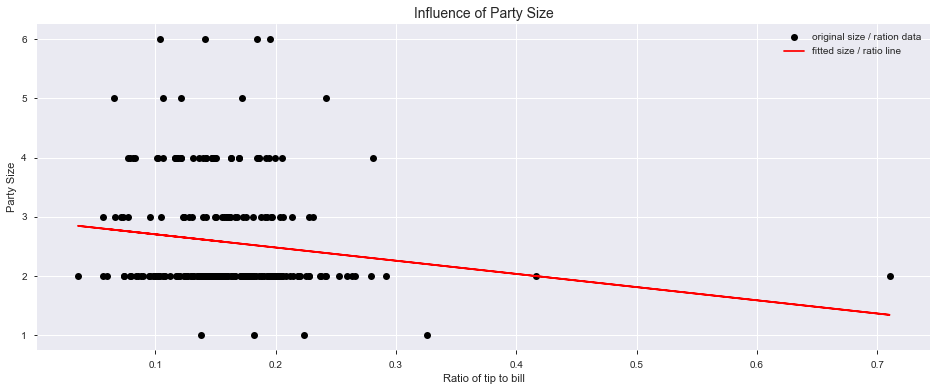

In [56]:
# Size comparison
# Get the regression line using all the data
rs_slope, rs_intercept, rs_r2, rs_p, rs_stdErr = stats.linregress(tips["ratio_tip_bill"], tips["size"])
print("r^2 Size vs Tip / Bill Ratio = ", rs_r2)

plt.rcParams['figure.figsize'] = [16, 6]
#fig=plt.figure(figsize=(5, 10),  facecolor='w', edgecolor='k')
# Plot both the raw data and the "best fit" lines

plt.plot(tips["ratio_tip_bill"], tips["size"], 'ko', label='original size / ration data')
plt.plot(tips["ratio_tip_bill"], rs_intercept + rs_slope*tips["ratio_tip_bill"], 'r', label='fitted size / ratio line')
plt.legend()

# Set labels
plt.xlabel('Ratio of tip to bill')
plt.ylabel('Party Size')
plt.title('Influence of Party Size',fontsize=14)
plt.show()

In [57]:
# Divide the dataset into inputs and outputs
# Inputs = the data we know
# Output = what we are looking for
inputs_tb = tips[['total_bill']]
outputs_tb = tips['tip']
# Build the neural network
model_tb = Sequential()
model_tb.add(Dense(25, input_dim=inputs_tb.shape[1], activation='relu')) # Hidden 1
model_tb.add(Dense(10, activation='relu')) # Hidden 2
model_tb.add(Dense(1)) # Output
model_tb.compile(loss='mean_squared_error', optimizer='adam')
model_tb.fit(inputs_tb,outputs_tb,verbose=2,epochs=100)

Train on 244 samples
Epoch 1/100
244/244 - 0s - loss: 11.0109
Epoch 2/100
244/244 - 0s - loss: 3.2494
Epoch 3/100
244/244 - 0s - loss: 1.3118
Epoch 4/100
244/244 - 0s - loss: 1.5691
Epoch 5/100
244/244 - 0s - loss: 1.4656
Epoch 6/100
244/244 - 0s - loss: 1.2142
Epoch 7/100
244/244 - 0s - loss: 1.2055
Epoch 8/100
244/244 - 0s - loss: 1.2291
Epoch 9/100
244/244 - 0s - loss: 1.2101
Epoch 10/100
244/244 - 0s - loss: 1.2000
Epoch 11/100
244/244 - 0s - loss: 1.1934
Epoch 12/100
244/244 - 0s - loss: 1.1913
Epoch 13/100
244/244 - 0s - loss: 1.1869
Epoch 14/100
244/244 - 0s - loss: 1.1972
Epoch 15/100
244/244 - 0s - loss: 1.1823
Epoch 16/100
244/244 - 0s - loss: 1.1848
Epoch 17/100
244/244 - 0s - loss: 1.1837
Epoch 18/100
244/244 - 0s - loss: 1.1824
Epoch 19/100
244/244 - 0s - loss: 1.1704
Epoch 20/100
244/244 - 0s - loss: 1.1691
Epoch 21/100
244/244 - 0s - loss: 1.1768
Epoch 22/100
244/244 - 0s - loss: 1.1750
Epoch 23/100
244/244 - 0s - loss: 1.1649
Epoch 24/100
244/244 - 0s - loss: 1.1600
Epo

In [58]:
pred_tb = model_tb.predict(inputs_tb)
print("Shape: {}".format(pred_tb.shape))
print(pred_tb)

Shape: (244, 1)
[[2.7019913]
 [1.9212735]
 [3.1739447]
 [3.487405 ]
 [3.5942411]
 [3.6764205]
 [1.7369534]
 [3.8630886]
 [2.4730597]
 [2.442535 ]
 [1.9130555]
 [4.846912 ]
 [2.5176718]
 [2.871049 ]
 [2.4484048]
 [3.2408626]
 [1.9200995]
 [2.6198108]
 [2.6996436]
 [3.1316798]
 [2.8111742]
 [3.0894144]
 [2.5587623]
 [5.3353   ]
 [3.0342371]
 [2.7982616]
 [2.276999 ]
 [2.197166 ]
 [3.2549498]
 [3.014278 ]
 [1.8285261]
 [2.8616571]
 [2.4754076]
 [3.1363761]
 [2.7947392]
 [3.5320184]
 [2.622159 ]
 [2.694948 ]
 [2.9015734]
 [4.3784804]
 [2.5904608]
 [2.7571702]
 [2.3439178]
 [1.8437887]
 [4.2763405]
 [2.8546133]
 [3.3171728]
 [4.5111446]
 [4.0591507]
 [2.8252633]
 [2.1795564]
 [1.9154037]
 [4.794082 ]
 [1.8743128]
 [3.708119 ]
 [2.995495 ]
 [5.169763 ]
 [3.8079119]
 [2.0269346]
 [6.3743014]
 [3.0894144]
 [2.3286567]
 [2.0011063]
 [2.8546138]
 [2.7724323]
 [3.0647607]
 [2.6385958]
 [1.0372589]
 [3.082372 ]
 [2.4695373]
 [2.118508 ]
 [2.7113836]
 [3.860742 ]
 [3.6752477]
 [2.436665 ]
 [1.94123

In [59]:
# Measure RMSE error.  RMSE is common for regression.
score_tb = np.sqrt(metrics.mean_squared_error(pred_tb,outputs_tb))
print(f"Final score (RMSE): {score_tb}")

Final score (RMSE): 1.024270989928799


In [60]:
# Sample predictions
for i in range(10):
    #    print(f"{i+1}. Car name: {cars[i]}, MPG: {y[i]}, predicted MPG: {pred[i]}")
    print(f"{i+1}. Total Bill: {inputs_tb['total_bill'][i]}, Actual Tip: {outputs_tb[i]}, predicted tip: {pred_tb[i]}")

1. Total Bill: 16.99, Actual Tip: 1.01, predicted tip: [2.7019913]
2. Total Bill: 10.34, Actual Tip: 1.66, predicted tip: [1.9212735]
3. Total Bill: 21.01, Actual Tip: 3.5, predicted tip: [3.1739447]
4. Total Bill: 23.68, Actual Tip: 3.31, predicted tip: [3.487405]
5. Total Bill: 24.59, Actual Tip: 3.61, predicted tip: [3.5942411]
6. Total Bill: 25.29, Actual Tip: 4.71, predicted tip: [3.6764205]
7. Total Bill: 8.77, Actual Tip: 2.0, predicted tip: [1.7369534]
8. Total Bill: 26.88, Actual Tip: 3.12, predicted tip: [3.8630886]
9. Total Bill: 15.04, Actual Tip: 1.96, predicted tip: [2.4730597]
10. Total Bill: 14.78, Actual Tip: 3.23, predicted tip: [2.442535]


In [61]:
# Divide the dataset into inputs and outputs
# Inputs = the data we know
# Output = what we are looking for
inputs_tbs = tips[['total_bill', 'size']]
outputs_tbs = tips['tip']
# Build the neural network
model_tbs = Sequential()
model_tbs.add(Dense(25, input_dim=inputs_tbs.shape[1], activation='relu')) # Hidden 1
model_tbs.add(Dense(10, activation='relu')) # Hidden 2
model_tbs.add(Dense(1)) # Output
model_tbs.compile(loss='mean_squared_error', optimizer='adam')
model_tbs.fit(inputs_tbs,outputs_tbs,verbose=2,epochs=100)

Train on 244 samples
Epoch 1/100
244/244 - 0s - loss: 6.7096
Epoch 2/100
244/244 - 0s - loss: 1.3630
Epoch 3/100
244/244 - 0s - loss: 1.7615
Epoch 4/100
244/244 - 0s - loss: 1.3696
Epoch 5/100
244/244 - 0s - loss: 1.1286
Epoch 6/100
244/244 - 0s - loss: 1.1873
Epoch 7/100
244/244 - 0s - loss: 1.0843
Epoch 8/100
244/244 - 0s - loss: 1.1057
Epoch 9/100
244/244 - 0s - loss: 1.1033
Epoch 10/100
244/244 - 0s - loss: 1.1005
Epoch 11/100
244/244 - 0s - loss: 1.0962
Epoch 12/100
244/244 - 0s - loss: 1.0877
Epoch 13/100
244/244 - 0s - loss: 1.0871
Epoch 14/100
244/244 - 0s - loss: 1.0795
Epoch 15/100
244/244 - 0s - loss: 1.0863
Epoch 16/100
244/244 - 0s - loss: 1.0802
Epoch 17/100
244/244 - 0s - loss: 1.0745
Epoch 18/100
244/244 - 0s - loss: 1.0725
Epoch 19/100
244/244 - 0s - loss: 1.0721
Epoch 20/100
244/244 - 0s - loss: 1.0706
Epoch 21/100
244/244 - 0s - loss: 1.0673
Epoch 22/100
244/244 - 0s - loss: 1.0673
Epoch 23/100
244/244 - 0s - loss: 1.0700
Epoch 24/100
244/244 - 0s - loss: 1.0679
Epoc

In [62]:
pred_tbs = model_tbs.predict(inputs_tbs)
print("Shape: {}".format(pred_tbs.shape))
print(pred_tbs)

Shape: (244, 1)
[[2.5670526]
 [2.3279066]
 [3.1442869]
 [3.1722097]
 [3.6784556]
 [3.74697  ]
 [1.7733448]
 [3.9025953]
 [2.3761916]
 [2.3507433]
 [1.9093153]
 [4.722808 ]
 [2.4133859]
 [3.10419  ]
 [2.3556368]
 [2.993556 ]
 [2.3276021]
 [2.6823068]
 [2.748862 ]
 [3.1090512]
 [2.6580787]
 [2.8815951]
 [2.4476428]
 [5.12998  ]
 [2.8401186]
 [3.0853033]
 [2.2127361]
 [2.1461797]
 [3.0037646]
 [2.8251169]
 [1.8388443]
 [3.1017523]
 [2.3781497]
 [3.2967327]
 [2.6443763]
 [3.4428134]
 [2.6842625]
 [2.7449472]
 [2.9172122]
 [4.1485095]
 [2.6578357]
 [2.6130552]
 [2.268527 ]
 [1.8515682]
 [4.247124 ]
 [2.6942935]
 [3.048854 ]
 [4.4428782]
 [3.8822832]
 [2.6698244]
 [2.1314976]
 [1.9112735]
 [4.678765 ]
 [1.8770168]
 [3.773396 ]
 [2.8109965]
 [4.9919715]
 [3.4044585]
 [2.0042574]
 [5.9621572]
 [2.8815951]
 [2.255802 ]
 [1.9827242]
 [3.0999253]
 [2.809546 ]
 [3.0532608]
 [2.5141988]
 [1.0604044]
 [2.8762999]
 [2.373256 ]
 [2.0806012]
 [2.7586496]
 [3.4427395]
 [3.3083253]
 [2.3458495]
 [1.93280

In [63]:
# Measure RMSE error.  RMSE is common for regression.
score_tbs = np.sqrt(metrics.mean_squared_error(pred_tbs,outputs_tbs))
print(f"Final score (RMSE): {score_tbs}")

Final score (RMSE): 1.0053023919230089


In [64]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Total Bill: {inputs_tbs['total_bill'][i]}, Size: {inputs_tbs['size'][i]} Actual Tip: {outputs_tbs[i]}, predicted tip: {pred_tbs[i]}")

1. Total Bill: 16.99, Size: 2 Actual Tip: 1.01, predicted tip: [2.5670526]
2. Total Bill: 10.34, Size: 3 Actual Tip: 1.66, predicted tip: [2.3279066]
3. Total Bill: 21.01, Size: 3 Actual Tip: 3.5, predicted tip: [3.1442869]
4. Total Bill: 23.68, Size: 2 Actual Tip: 3.31, predicted tip: [3.1722097]
5. Total Bill: 24.59, Size: 4 Actual Tip: 3.61, predicted tip: [3.6784556]
6. Total Bill: 25.29, Size: 4 Actual Tip: 4.71, predicted tip: [3.74697]
7. Total Bill: 8.77, Size: 2 Actual Tip: 2.0, predicted tip: [1.7733448]
8. Total Bill: 26.88, Size: 4 Actual Tip: 3.12, predicted tip: [3.9025953]
9. Total Bill: 15.04, Size: 2 Actual Tip: 1.96, predicted tip: [2.3761916]
10. Total Bill: 14.78, Size: 2 Actual Tip: 3.23, predicted tip: [2.3507433]


In [65]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Total Bill: {inputs_tbs['total_bill'][i]}, Size: {inputs_tbs['size'][i]} Actual Tip: {outputs_tbs[i]}, predicted tip: {pred_tb[i]}, predicted tip(Size): {pred_tbs[i]}")

1. Total Bill: 16.99, Size: 2 Actual Tip: 1.01, predicted tip: [2.7019913], predicted tip(Size): [2.5670526]
2. Total Bill: 10.34, Size: 3 Actual Tip: 1.66, predicted tip: [1.9212735], predicted tip(Size): [2.3279066]
3. Total Bill: 21.01, Size: 3 Actual Tip: 3.5, predicted tip: [3.1739447], predicted tip(Size): [3.1442869]
4. Total Bill: 23.68, Size: 2 Actual Tip: 3.31, predicted tip: [3.487405], predicted tip(Size): [3.1722097]
5. Total Bill: 24.59, Size: 4 Actual Tip: 3.61, predicted tip: [3.5942411], predicted tip(Size): [3.6784556]
6. Total Bill: 25.29, Size: 4 Actual Tip: 4.71, predicted tip: [3.6764205], predicted tip(Size): [3.74697]
7. Total Bill: 8.77, Size: 2 Actual Tip: 2.0, predicted tip: [1.7369534], predicted tip(Size): [1.7733448]
8. Total Bill: 26.88, Size: 4 Actual Tip: 3.12, predicted tip: [3.8630886], predicted tip(Size): [3.9025953]
9. Total Bill: 15.04, Size: 2 Actual Tip: 1.96, predicted tip: [2.4730597], predicted tip(Size): [2.3761916]
10. Total Bill: 14.78, Si

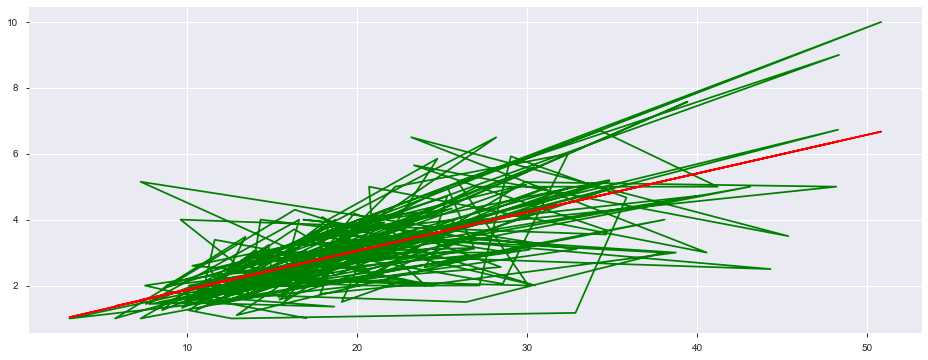

In [66]:
plt.plot(inputs_tb['total_bill'], outputs_tb, "g-")
plt.plot(inputs_tb['total_bill'], pred_tb, "r-")


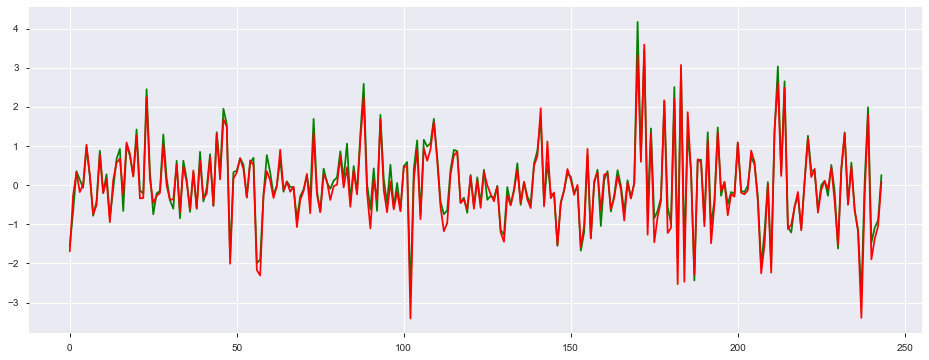

In [67]:
# Sample predictions
var_tbs=[]
var_tb=[]
for i in range(len(outputs_tbs)):
    var_tbs.append(outputs_tbs[i] - pred_tbs[i])
    var_tb.append(outputs_tb[i] - pred_tb[i])
plt.plot(var_tbs, "g-")
plt.plot(var_tb, "r-")


In [68]:
table = [["Mean", np.mean(var_tb), np.mean(var_tbs)], \
         ["Minimum", np.min(var_tb), np.min(var_tbs)], \
         ["Maximum", np.max(var_tb), np.max(var_tbs)], \
         ["Standard Devation", np.std(var_tb), np.std(var_tbs)]]
hdr = ["Category", "Total Bill Only", "Total Bill & Size"]
print(tabulate(table, headers = hdr,  tablefmt="grid"))

+-------------------+-------------------+---------------------+
| Category          |   Total Bill Only |   Total Bill & Size |
+===================+===================+=====================+
| Mean              |        -0.0317871 |           0.0592164 |
+-------------------+-------------------+---------------------+
| Minimum           |        -3.40822   |          -2.78063   |
+-------------------+-------------------+---------------------+
| Maximum           |         3.593     |           4.17076   |
+-------------------+-------------------+---------------------+
| Standard Devation |         1.02378   |           1.00356   |
+-------------------+-------------------+---------------------+


Data is most meaningful when it is collected for a purpose. In that way you can state the conditions under which it is collected, what decisional information is to be garnered from the data etc. The data in this dataset is not gathered under such conditions and therefore any analysis will be tempered by the lack of understanding of its collection. 

The analysis itself may be taken from a number of different perspectives and tailored to suit the requirements. In the absence of such governing principles, it has been decided to see what we can infer from the existing data based on a number of assumptions. These assumptions will be stated from each perspective below. To start we will begin with the general analysis.

## General Analysis
**Assumptions:** None  


### References ###
[1] https://github.com/mwaskom/seaborn-data/blob/master/tips.csv.  
[2] https://rdrr.io/cran/regclass/man/TIPS.html  
[3] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html  
[4] Jeff Heaton Introduction to Tensorflow https://www.youtube.com/watch?v=PsE73jk55cE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN